In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = psycopg2.connect(
    host="db", database="5SPAR",
    user="myuser", password="mysecretpassword"
)

# 1. Distribution des sentiments
query = """
SELECT sentiment, COUNT(*) as count 
FROM mastodon_sentiment 
GROUP BY sentiment
"""
sentiment_dist = pd.read_sql(query, conn)

plt.figure(figsize=(8, 5))
plt.bar(sentiment_dist['sentiment'], sentiment_dist['count'])
plt.title('Distribution des sentiments')
plt.show()

# 2. Toots par heure
query = """
SELECT EXTRACT(HOUR FROM created_at) as heure, COUNT(*) as count
FROM mastodon_stream
GROUP BY heure
ORDER BY heure
"""
hourly = pd.read_sql(query, conn)

plt.figure(figsize=(12, 5))
plt.plot(hourly['heure'], hourly['count'], marker='o')
plt.title('Nombre de toots par heure')
plt.show()

# 3. Top 10 comptes
query = """
SELECT account, COUNT(*) as nb_toots
FROM mastodon_stream
GROUP BY account
ORDER BY nb_toots DESC
LIMIT 10
"""
top_accounts = pd.read_sql(query, conn)

plt.figure(figsize=(10, 6))
plt.barh(top_accounts['account'], top_accounts['nb_toots'])
plt.title('Top 10 comptes actifs')
plt.show()

conn.close()

ModuleNotFoundError: No module named 'psycopg2'

In [4]:
pip install psycopg2-binary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 18.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_3463/4085516957.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sentiment_dist = pd.read_sql(query, conn)


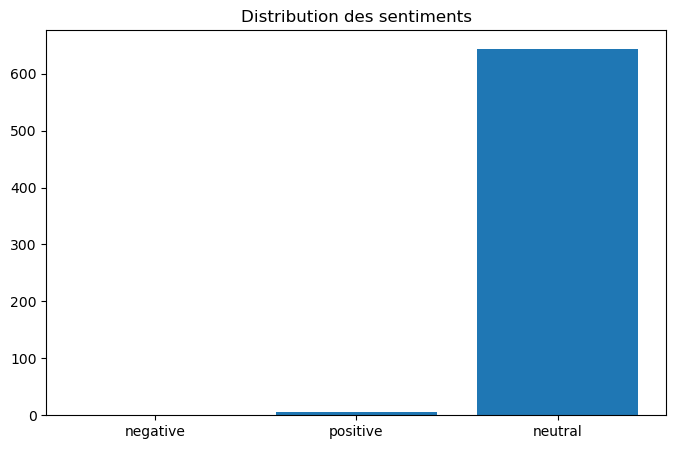

/tmp/ipykernel_3463/4085516957.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  hourly = pd.read_sql(query, conn)


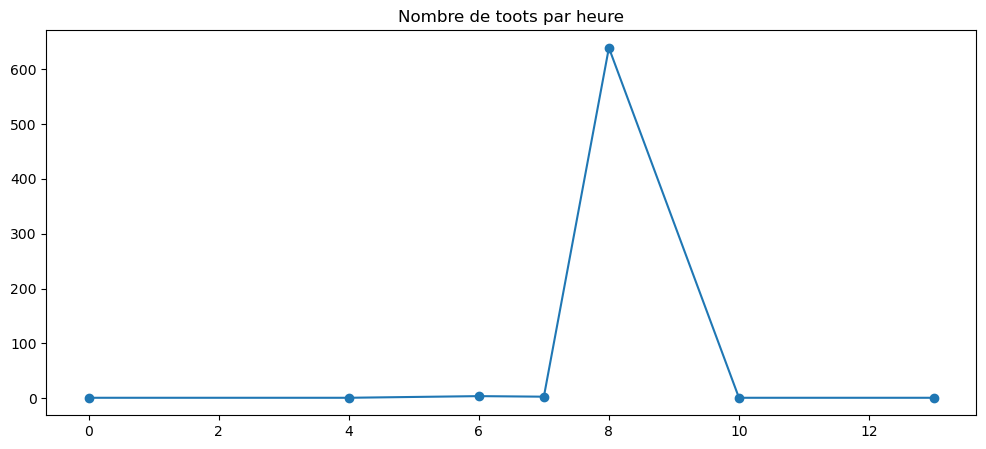

/tmp/ipykernel_3463/4085516957.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_accounts = pd.read_sql(query, conn)


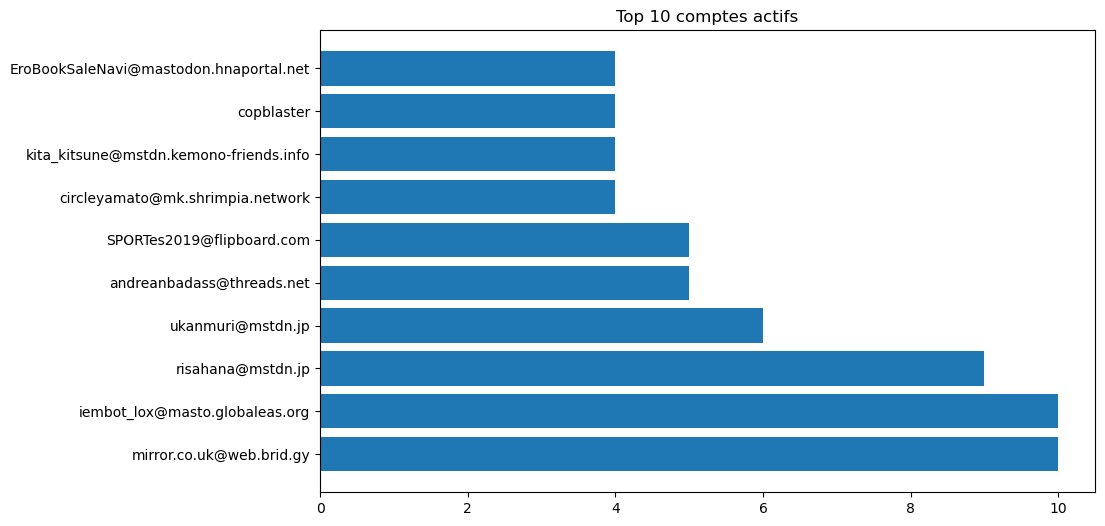

In [5]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = psycopg2.connect(
    host="db", database="5SPAR",
    user="myuser", password="mysecretpassword"
)

# 1. Distribution des sentiments
query = """
SELECT sentiment, COUNT(*) as count 
FROM mastodon_sentiment 
GROUP BY sentiment
"""
sentiment_dist = pd.read_sql(query, conn)

plt.figure(figsize=(8, 5))
plt.bar(sentiment_dist['sentiment'], sentiment_dist['count'])
plt.title('Distribution des sentiments')
plt.show()

# 2. Toots par heure
query = """
SELECT EXTRACT(HOUR FROM created_at) as heure, COUNT(*) as count
FROM mastodon_stream
GROUP BY heure
ORDER BY heure
"""
hourly = pd.read_sql(query, conn)

plt.figure(figsize=(12, 5))
plt.plot(hourly['heure'], hourly['count'], marker='o')
plt.title('Nombre de toots par heure')
plt.show()

# 3. Top 10 comptes
query = """
SELECT account, COUNT(*) as nb_toots
FROM mastodon_stream
GROUP BY account
ORDER BY nb_toots DESC
LIMIT 10
"""
top_accounts = pd.read_sql(query, conn)

plt.figure(figsize=(10, 6))
plt.barh(top_accounts['account'], top_accounts['nb_toots'])
plt.title('Top 10 comptes actifs')
plt.show()

conn.close()